<a href="https://colab.research.google.com/github/ToghrulUTD/Web-Scraping-and-Sentiment-Classification-for-Amazon-Customer-Reviews/blob/main/ETL_Aspect_Extraction_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Preprocessing

## Doorbell

In [ ]:
data = pd.read_csv('/content/ring_video_doorbell.csv')
print(data.shape)
data.head(3)

(520, 11)


title  \
0                            Love it.   
1                     Son feels safer   
2  Great Device - Beware of Pre-Setup   

                                                body  \
0                  Exactly what we were looking for.   
1                                   Easy to install!   
2  I have for Amazon Echo Dot's in my home and pu...   

                                              date             status  \
0  Reviewed in the United States on April 26, 2023  Verified Purchase   
1  Reviewed in the United States on April 26, 2023  Verified Purchase   
2  Reviewed in the United States on April 25, 2023  Verified Purchase   

     votes contains_image            color  configuration               score  \
0  no vote            Yes  Venetian Bronze  Doorbell only  5.0 out of 5 stars   
1  no vote            Yes  Venetian Bronze  Doorbell only  5.0 out of 5 stars   
2  no vote            Yes  Venetian Bronze  Doorbell only  4.0 out of 5 stars   

                                             product        asin  
0  Ring Video Doorbell - 1080p HD video, improved...  B08N5NQ869  
1  Ring Video Doorbell - 1080p HD video, improved...  B08N5NQ869  
2  Ring Video Doorbell - 1080p HD video, improved...  B08N5NQ869

### Clean and Transform

In [ ]:
from datetime import datetime

def preprocess_doorbell(data):
  # Convert string date to date format
  data['date'] = data['date'].apply(lambda x:  datetime.strptime(x.split('on')[1].strip(), '%B %d, %Y').date())
  # Convert string rating to numerical format
  data['score'] = data['score'].apply(lambda x: float(x[:3]) if x[0].isdigit() else None)
  # Convert number of helpful votes to numerical
  def count_votes(vote_string):
    vote_string = vote_string.split()[0] 
    if vote_string == 'no': 
      return 0
    elif vote_string == 'One': 
      return 1
    else: 
      return int(vote_string)
  data['votes'] = data['votes'].apply(lambda x: count_votes(x))
  # Improve status values 
  data['status'] = data.status.apply(lambda x: 'Verified' if x == 'Verified Purchase' else 'Not Verified')
  data.drop(columns = ['contains_image'], inplace = True)
  return data

# Call cleaning-preprocessing function
data1 = preprocess_doorbell(data )
# Check cleaned data
data1.head(3)

title  \
0                            Love it.   
1                     Son feels safer   
2  Great Device - Beware of Pre-Setup   

                                                body        date    status  \
0                  Exactly what we were looking for.  2023-04-26  Verified   
1                                   Easy to install!  2023-04-26  Verified   
2  I have for Amazon Echo Dot's in my home and pu...  2023-04-25  Verified   

   votes            color  configuration  score  \
0      0  Venetian Bronze  Doorbell only    5.0   
1      0  Venetian Bronze  Doorbell only    5.0   
2      0  Venetian Bronze  Doorbell only    4.0   

                                             product        asin  
0  Ring Video Doorbell - 1080p HD video, improved...  B08N5NQ869  
1  Ring Video Doorbell - 1080p HD video, improved...  B08N5NQ869  
2  Ring Video Doorbell - 1080p HD video, improved...  B08N5NQ869

In [ ]:
data1.describe(include = 'object')

title       body        date    status         color  configuration  \
count       520        520         520       520           520            520   
unique      459        517          56         2             2              2   
top     Love it  Wonderful  2023-04-11  Verified  Satin Nickel  Doorbell only   
freq         11          2          18       463           288            512   

                                                  product        asin  
count                                                 520         520  
unique                                                  1           1  
top     Ring Video Doorbell - 1080p HD video, improved...  B08N5NQ869  
freq                                                  520         520

## Indoor Camera

In [ ]:
data = pd.read_csv('/content/ring_indoor_security_cam.csv')
print(data.shape)
data.head(3)

(720, 12)


title  \
0                    Did T work with my Wi-Fi   
1                                     Amazing   
2  Perfect camera for mom's nursing home room   

                                                body  \
0   For some reason it wouldn’t connect to my Wi-Fi.   
1  So far, I am loving these indoor cameras. They...   
2  Works as advertised, easy setup-especially if ...   

                                                date             status  \
0  Reviewed in the United States 🇺🇸 on April 25, ...  Verified Purchase   
1  Reviewed in the United States 🇺🇸 on April 25, ...  Verified Purchase   
2  Reviewed in the United States 🇺🇸 on April 25, ...  Verified Purchase   

     votes contains_image        style  color      size               score  \
0  no vote            Yes  Device Only  White  1 Camera  3.0 out of 5 stars   
1  no vote            Yes  Device Only  Black  1 Camera  4.0 out of 5 stars   
2  no vote            Yes  Device Only  White  1 Camera  5.0 out of 5 stars   

                                             product        asin  
0  Ring Indoor Cam, Compact Plug-In HD security c...  B07Q9VBYV8  
1  Ring Indoor Cam, Compact Plug-In HD security c...  B07Q9VBYV8  
2  Ring Indoor Cam, Compact Plug-In HD security c...  B07Q9VBYV8

### Clean and Transform

In [ ]:
from datetime import datetime

def preprocess_indoor(data):
  # Convert string date to date format
  data['date'] = data['date'].apply(lambda x:  datetime.strptime(x.split('on')[1].strip(), '%B %d, %Y').date())
  # Convert string rating to numerical format
  data['score'] = data['score'].apply(lambda x: float(x[:3]) if x[0].isdigit() else None)
  # Convert number of helpful votes to numerical
  def count_votes(vote_string):
    vote_string = vote_string.split()[0] 
    if vote_string == 'no': 
      return 0
    elif vote_string == 'One': 
      return 1
    else: 
      return int(vote_string)
  data['votes'] = data['votes'].apply(lambda x: count_votes(x))
  # Improve status values 
  data['status'] = data.status.apply(lambda x: 'Verified' if x == 'Verified Purchase' else 'Not Verified')
  data.drop(columns = ['contains_image'], inplace = True)
  return data

# Call cleaning-preprocessing function
data2 = preprocess_indoor(data )
# Check cleaned data
data2.head(3)

title  \
0                    Did T work with my Wi-Fi   
1                                     Amazing   
2  Perfect camera for mom's nursing home room   

                                                body        date    status  \
0   For some reason it wouldn’t connect to my Wi-Fi.  2023-04-25  Verified   
1  So far, I am loving these indoor cameras. They...  2023-04-25  Verified   
2  Works as advertised, easy setup-especially if ...  2023-04-25  Verified   

   votes        style  color      size  score  \
0      0  Device Only  White  1 Camera    3.0   
1      0  Device Only  Black  1 Camera    4.0   
2      0  Device Only  White  1 Camera    5.0   

                                             product        asin  
0  Ring Indoor Cam, Compact Plug-In HD security c...  B07Q9VBYV8  
1  Ring Indoor Cam, Compact Plug-In HD security c...  B07Q9VBYV8  
2  Ring Indoor Cam, Compact Plug-In HD security c...  B07Q9VBYV8

In [ ]:
data2.describe(include = 'object')

title        body        date    status        style  color      size  \
count     720         718         720       720          720    720       720   
unique    646         715         185         2            2      2         2   
top     Great  Easy setup  2022-08-21  Verified  Device Only  White  1 Camera   
freq        7           2          11       672          713    558       617   

                                                  product        asin  
count                                                 720         720  
unique                                                  1           1  
top     Ring Indoor Cam, Compact Plug-In HD security c...  B07Q9VBYV8  
freq                                                  720         720

## Outdoor Camera

In [ ]:
data = pd.read_csv('/content/ring_outdoor_security_cam.csv')
print(data.shape)
data.head(3)

(512, 12)


title  \
0                                            Problem   
1                                   Lasted 10 months   
2  If you change your Wi-Fi camera may never conn...   

                                                body  \
0  The camera received was poor quality and batte...   
1  Got this in Jan 2022 and it died Oct 2022. I c...   
2  I had no issues with my camera other than the ...   

                                                date             status  \
0  Reviewed in the United States 🇺🇸 on April 21, ...  Verified Purchase   
1  Reviewed in the United States 🇺🇸 on April 17, ...  Verified Purchase   
2  Reviewed in the United States 🇺🇸 on April 17, ...  Verified Purchase   

     votes contains_image configuration  color   size               score  \
0  no vote            Yes   Device Only  White  1 Cam  2.0 out of 5 stars   
1  no vote            Yes   Device Only  Black  1 Cam  2.0 out of 5 stars   
2  no vote            Yes   Device Only  Black  1 Cam  3.0 out of 5 stars   

                                             product        asin  
0  Ring Spotlight Cam Battery HD Security Camera ...  B0758L64L9  
1  Ring Spotlight Cam Battery HD Security Camera ...  B0758L64L9  
2  Ring Spotlight Cam Battery HD Security Camera ...  B0758L64L9

### Clean and transform

In [ ]:
from datetime import datetime

def preprocess_outdoor(data):
  # Convert string date to date format
  data['date'] = data['date'].apply(lambda x:  datetime.strptime(x.split('on')[1].strip(), '%B %d, %Y').date())
  # Convert string rating to numerical format
  data['score'] = data['score'].apply(lambda x: float(x[:3]) if x[0].isdigit() else None)
  # Convert number of helpful votes to numerical
  def count_votes(vote_string):
    vote_string = vote_string.split()[0] 
    if vote_string == 'no': 
      return 0
    elif vote_string == 'One': 
      return 1
    else: 
      return int(vote_string)
  data['votes'] = data['votes'].apply(lambda x: count_votes(x))
  # Improve status values 
  data['status'] = data.status.apply(lambda x: 'Verified' if x == 'Verified Purchase' else 'Not Verified')
  data.drop(columns = ['contains_image'], inplace = True)
  return data

# Call cleaning-preprocessing function
data3 = preprocess_outdoor(data )
# Check cleaned data
data3.head(3)

title  \
0                                            Problem   
1                                   Lasted 10 months   
2  If you change your Wi-Fi camera may never conn...   

                                                body        date    status  \
0  The camera received was poor quality and batte...  2023-04-21  Verified   
1  Got this in Jan 2022 and it died Oct 2022. I c...  2023-04-17  Verified   
2  I had no issues with my camera other than the ...  2023-04-17  Verified   

   votes configuration  color   size  score  \
0      0   Device Only  White  1 Cam    2.0   
1      0   Device Only  Black  1 Cam    2.0   
2      0   Device Only  Black  1 Cam    3.0   

                                             product        asin  
0  Ring Spotlight Cam Battery HD Security Camera ...  B0758L64L9  
1  Ring Spotlight Cam Battery HD Security Camera ...  B0758L64L9  
2  Ring Spotlight Cam Battery HD Security Camera ...  B0758L64L9

In [ ]:
data3.describe(include = 'object')

title      body        date    status configuration  color   size  \
count        512       512         512       512           512    512    512   
unique       473       509         241         2             2      2      2   
top     Security  Security  2022-09-26  Verified   Device Only  White  1 Cam   
freq           5         2           7       435           508    414    428   

                                                  product        asin  
count                                                 512         512  
unique                                                  1           1  
top     Ring Spotlight Cam Battery HD Security Camera ...  B0758L64L9  
freq                                                  512         512

## Smart Lighting

In [ ]:
data = pd.read_csv('/content/ring_smart_lighting_bridge.csv')
print(data.shape)
data.head(3)

(340, 8)


title  \
0                           Aún a la distancia   
1  Can’t connect or use the bridge as a bridge   
2       reliable, easy, great customer support   

                                                body  \
0  Funciona perfecto, le agregué una cámara y me ...   
1  Can’t get this to connect. With the cold weath...   
2             reliable, easy, great customer support   

                                                date             status  \
0  Reviewed in the United States 🇺🇸 on April 24, ...  Verified Purchase   
1  Reviewed in the United States 🇺🇸 on April 18, ...  Verified Purchase   
2  Reviewed in the United States 🇺🇸 on April 17, ...  Verified Purchase   

     votes               score                       product        asin  
0  no vote  5.0 out of 5 stars  Ring Smart Lighting – Bridge  B07KXBX65F  
1  no vote  1.0 out of 5 stars  Ring Smart Lighting – Bridge  B07KXBX65F  
2  no vote  5.0 out of 5 stars  Ring Smart Lighting – Bridge  B07KXBX65F

### Clean and Transform

In [ ]:
from datetime import datetime

def preprocess_lighting(data):
  # Convert string date to date format
  data['date'] = data['date'].apply(lambda x:  datetime.strptime(x.split('on')[1].strip(), '%B %d, %Y').date())
  # Convert string rating to numerical format
  data['score'] = data['score'].apply(lambda x: float(x[:3]) if x[0].isdigit() else None)
  # Convert number of helpful votes to numerical
  def count_votes(vote_string):
    vote_string = vote_string.split()[0] 
    if vote_string == 'no': 
      return 0
    elif vote_string == 'One': 
      return 1
    else: 
      return int(vote_string)
  data['votes'] = data['votes'].apply(lambda x: count_votes(x))
  # Improve status values 
  data['status'] = data.status.apply(lambda x: 'Verified' if x == 'Verified Purchase' else 'Not Verified')
  return data

# Call cleaning-preprocessing function
data4 = preprocess_lighting(data )
# Check cleaned data
data4.head(3)

title  \
0                           Aún a la distancia   
1  Can’t connect or use the bridge as a bridge   
2       reliable, easy, great customer support   

                                                body        date    status  \
0  Funciona perfecto, le agregué una cámara y me ...  2023-04-24  Verified   
1  Can’t get this to connect. With the cold weath...  2023-04-18  Verified   
2             reliable, easy, great customer support  2023-04-17  Verified   

   votes  score                       product        asin  
0      0    5.0  Ring Smart Lighting – Bridge  B07KXBX65F  
1      0    1.0  Ring Smart Lighting – Bridge  B07KXBX65F  
2      0    5.0  Ring Smart Lighting – Bridge  B07KXBX65F

In [ ]:
data4.describe(include = 'object')

title         body        date    status  \
count           339          340         340       340   
unique          316          333         262         2   
top     Works great  Works great  2020-11-26  Verified   
freq              8            3           6       323   

                             product        asin  
count                            340         340  
unique                             1           1  
top     Ring Smart Lighting – Bridge  B07KXBX65F  
freq                             340         340

## Ring Alarm Kit

In [ ]:
data = pd.read_csv('/content/ring_alarm_kit.csv')
print(data.shape)
data.head(3)

(480, 9)


title                                               body  \
0   Bait & Switch  I would love this product, except for the fact...   
1            Good  The system is amazing but the noise is not lou...   
2  Great purchase  Easy to install and after weeks of use, still ...   

                                                date             status  \
0  Reviewed in the United States 🇺🇸 on April 24, ...  Verified Purchase   
1  Reviewed in the United States 🇺🇸 on April 21, ...  Verified Purchase   
2  Reviewed in the United States 🇺🇸 on April 15, ...  Verified Purchase   

     votes               score       style  \
0  no vote  2.0 out of 5 stars  Ring Alarm   
1  no vote  3.0 out of 5 stars  Ring Alarm   
2  no vote  5.0 out of 5 stars  Ring Alarm   

                                             product        asin  
0  Ring Alarm 8-piece kit (2nd Gen) – home securi...  B07ZPMCW64  
1  Ring Alarm 8-piece kit (2nd Gen) – home securi...  B07ZPMCW64  
2  Ring Alarm 8-piece kit (2nd Gen) – home securi...  B07ZPMCW64

### Clean and Transform

In [ ]:
from datetime import datetime

def preprocess_lighting(data):
  # Convert string date to date format
  data['date'] = data['date'].apply(lambda x:  datetime.strptime(x.split('on')[1].strip(), '%B %d, %Y').date())
  # Convert string rating to numerical format
  data['score'] = data['score'].apply(lambda x: float(x[:3]) if x[0].isdigit() else None)
  # Convert number of helpful votes to numerical
  def count_votes(vote_string):
    vote_string = vote_string.split()[0] 
    if vote_string == 'no': 
      return 0
    elif vote_string == 'One': 
      return 1
    else: 
      return int(vote_string)
  data['votes'] = data['votes'].apply(lambda x: count_votes(x))
  # Improve status values 
  data['status'] = data.status.apply(lambda x: 'Verified' if x == 'Verified Purchase' else 'Not Verified')
  return data

# Call cleaning-preprocessing function
data5 = preprocess_lighting(data )
# Check cleaned data
data5.head(3)

title                                               body  \
0   Bait & Switch  I would love this product, except for the fact...   
1            Good  The system is amazing but the noise is not lou...   
2  Great purchase  Easy to install and after weeks of use, still ...   

         date    status  votes  score       style  \
0  2023-04-24  Verified      0    2.0  Ring Alarm   
1  2023-04-21  Verified      0    3.0  Ring Alarm   
2  2023-04-15  Verified      0    5.0  Ring Alarm   

                                             product        asin  
0  Ring Alarm 8-piece kit (2nd Gen) – home securi...  B07ZPMCW64  
1  Ring Alarm 8-piece kit (2nd Gen) – home securi...  B07ZPMCW64  
2  Ring Alarm 8-piece kit (2nd Gen) – home securi...  B07ZPMCW64

In [ ]:
data5.describe(include='object')

title     body        date    status       style  \
count              480      480         480       480         480   
unique             449      479         332         2           4   
top     Easy to set up  Love it  2022-02-08  Verified  Ring Alarm   
freq                 5        2           5       355         462   

                                                  product        asin  
count                                                 480         480  
unique                                                  1           1  
top     Ring Alarm 8-piece kit (2nd Gen) – home securi...  B07ZPMCW64  
freq                                                  480         480

## Combine DataFrames 

In [ ]:
# Concatenate dataframes 
reviews_df = pd.concat([data1, data2, data3, data4, data5], axis = 0, ignore_index = True)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2571 non-null   object 
 1   body           2570 non-null   object 
 2   date           2572 non-null   object 
 3   status         2572 non-null   object 
 4   votes          2572 non-null   int64  
 5   color          1752 non-null   object 
 6   configuration  1032 non-null   object 
 7   score          2556 non-null   float64
 8   product        2572 non-null   object 
 9   asin           2572 non-null   object 
 10  style          1200 non-null   object 
 11  size           1232 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 241.2+ KB


In [ ]:
# Clean missing values for color, configuration, style, size
reviews_df[['color', 'configuration', 'style', 'size']] = reviews_df[['color', 'configuration', 'style', 'size']].fillna(value = 'Single Option')
# Drop rows with missing review score (just few rows)
reviews_df = reviews_df.loc[~reviews_df.score.isna(),:]
# Fill in missing title and body (few rows)
reviews_df['title'].fillna(value = 'title', inplace = True)
reviews_df['body'].fillna(value = 'body', inplace = True)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556 entries, 0 to 2571
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2556 non-null   object 
 1   body           2556 non-null   object 
 2   date           2556 non-null   object 
 3   status         2556 non-null   object 
 4   votes          2556 non-null   int64  
 5   color          2556 non-null   object 
 6   configuration  2556 non-null   object 
 7   score          2556 non-null   float64
 8   product        2556 non-null   object 
 9   asin           2556 non-null   object 
 10  style          2556 non-null   object 
 11  size           2556 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 259.6+ KB


<ipython-input-114-9bec02f1464b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['title'].fillna(value = 'title', inplace = True)
<ipython-input-114-9bec02f1464b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['body'].fillna(value = 'body', inplace = True)


In [ ]:
# Describe review stars
reviews_df[['score']].describe()

score
count  2556.000000
mean      3.631847
std       1.672685
min       1.000000
25%       2.000000
50%       5.000000
75%       5.000000
max       5.000000

In [ ]:
reviews_df.describe(include = 'object')

title         body        date    status  color  configuration  \
count      2556         2556        2556      2556   2556           2556   
unique     2146         2513         703         2      5              5   
top     Love it  Works great  2023-04-21  Verified  White  Single Option   
freq         24            7          23      2234    964           1532   

                                                  product        asin  \
count                                                2556        2556   
unique                                                  5           5   
top     Ring Indoor Cam, Compact Plug-In HD security c...  B07Q9VBYV8   
freq                                                  717         717   

                style           size  
count            2556           2556  
unique              7              5  
top     Single Option  Single Option  
freq             1363           1333

In [ ]:
# Save the final dataframe to csv file
reviews_df.to_csv('ring_reviews.csv', index = False)

# Data Exploration and Analytics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the transformed dataframe
reviews_df = pd.read_csv('ring_reviews.csv')
reviews_df['date'] =  pd.to_datetime(reviews_df.date).dt.strftime('%m-%d-%Y')
reviews_df.sort_values('date', inplace = True)
reviews_df.head()

title  \
1683                                          delayed   
2294                                           Alarms   
1844  It’s been a year now and is still working great   
1845                 New packaging but a used product   
1684                          Loved it…but short life   

                                                   body        date  \
1683  The unit and Ring has a delay in the motion no...  01-01-2022   
2294  Be sure to check settings to see how the unit ...  01-01-2022   
1844    It’s been a year now and is still working great  01-01-2022   
1845  The ring product is great! The problem is Amaz...  01-01-2022   
1684  I’m really bummed to have found this out. I wa...  01-01-2022   

            status  votes          color  configuration  score  \
1683      Verified      0          White    Device Only    3.0   
2294      Verified      0  Single Option  Single Option    4.0   
1844      Verified      0  Single Option  Single Option    5.0   
1845  Not Verified      1  Single Option  Single Option    1.0   
1684  Not Verified      1          White    Device Only    1.0   

                                                product        asin  \
1683  Ring Spotlight Cam Battery HD Security Camera ...  B0758L64L9   
2294  Ring Alarm 8-piece kit (2nd Gen) – home securi...  B07ZPMCW64   
1844                       Ring Smart Lighting – Bridge  B07KXBX65F   
1845                       Ring Smart Lighting – Bridge  B07KXBX65F   
1684  Ring Spotlight Cam Battery HD Security Camera ...  B0758L64L9   

              style           size  
1683  Single Option          1 Cam  
2294     Ring Alarm  Single Option  
1844  Single Option  Single Option  
1845  Single Option  Single Option  
1684  Single Option          1 Cam

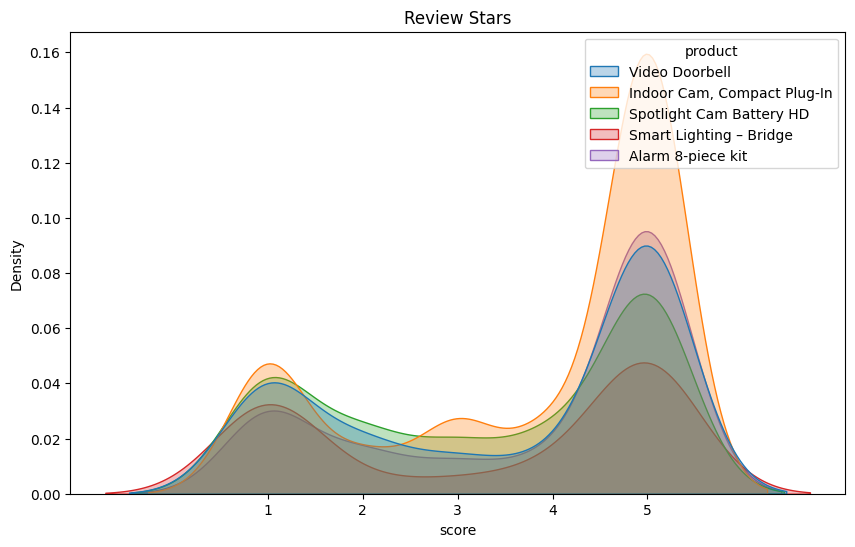

In [ ]:
plt.figure(figsize = (10,6))
hue = reviews_df['product'].apply(lambda x: ' '.join(x.split()[1:5]).split('(')[0].split(' -')[0])
sns.kdeplot(data = reviews_df.sort_values('score'), x = 'score', alpha = 0.3, hue = hue, fill = 'stack')#, multiple = 'stack')
plt.xticks([1,2,3,4,5])
plt.title('Review Stars')
plt.show()

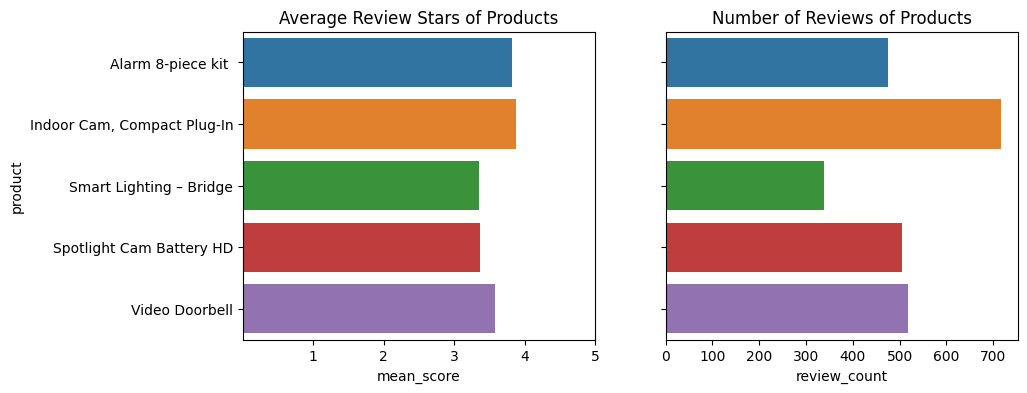

In [ ]:
plt.figure(figsize = (10,4))

# Group rating score data using product names
grouped = reviews_df.groupby('product').score.agg(['mean', 'count']).reset_index().rename(columns = {'mean':'mean_score', 'count':'review_count'})
grouped['product'] = grouped['product'].apply(lambda x: ' '.join(x.split()[1:5]).split('(')[0].split(' -')[0])

# Plot average ratings for products
plt.subplot(1,2,1)
sns.barplot(y = grouped['product'], x = grouped.mean_score)
plt.xticks([1,2,3,4,5])
plt.title('Average Review Stars of Products')

# Plot the number of ratings scraped for products
plt.subplot(1,2,2)
ax = sns.barplot(y = grouped['product'], x = grouped.review_count)
ax.yaxis.set_tick_params(labelleft=False)
plt.ylabel('')
plt.title('Number of Reviews of Products')
plt.show()

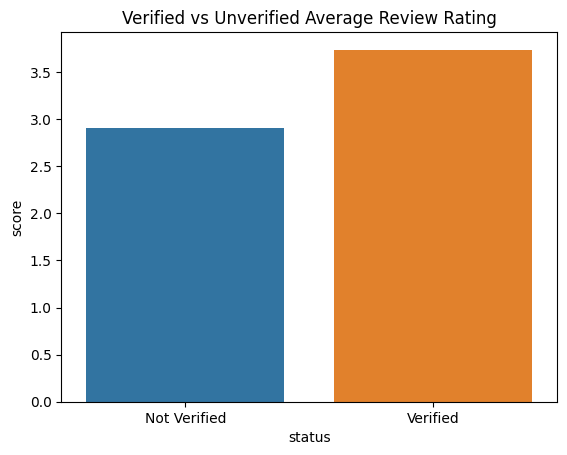

In [ ]:
# Check average review score from verified vs un-verified users
grouped = reviews_df.groupby('status').score.mean().reset_index()
sns.barplot(x = grouped.status, y = grouped.score)
plt.title('Verified vs Unverified Average Review Rating')
plt.show()

## Find the product aspects causing most issues

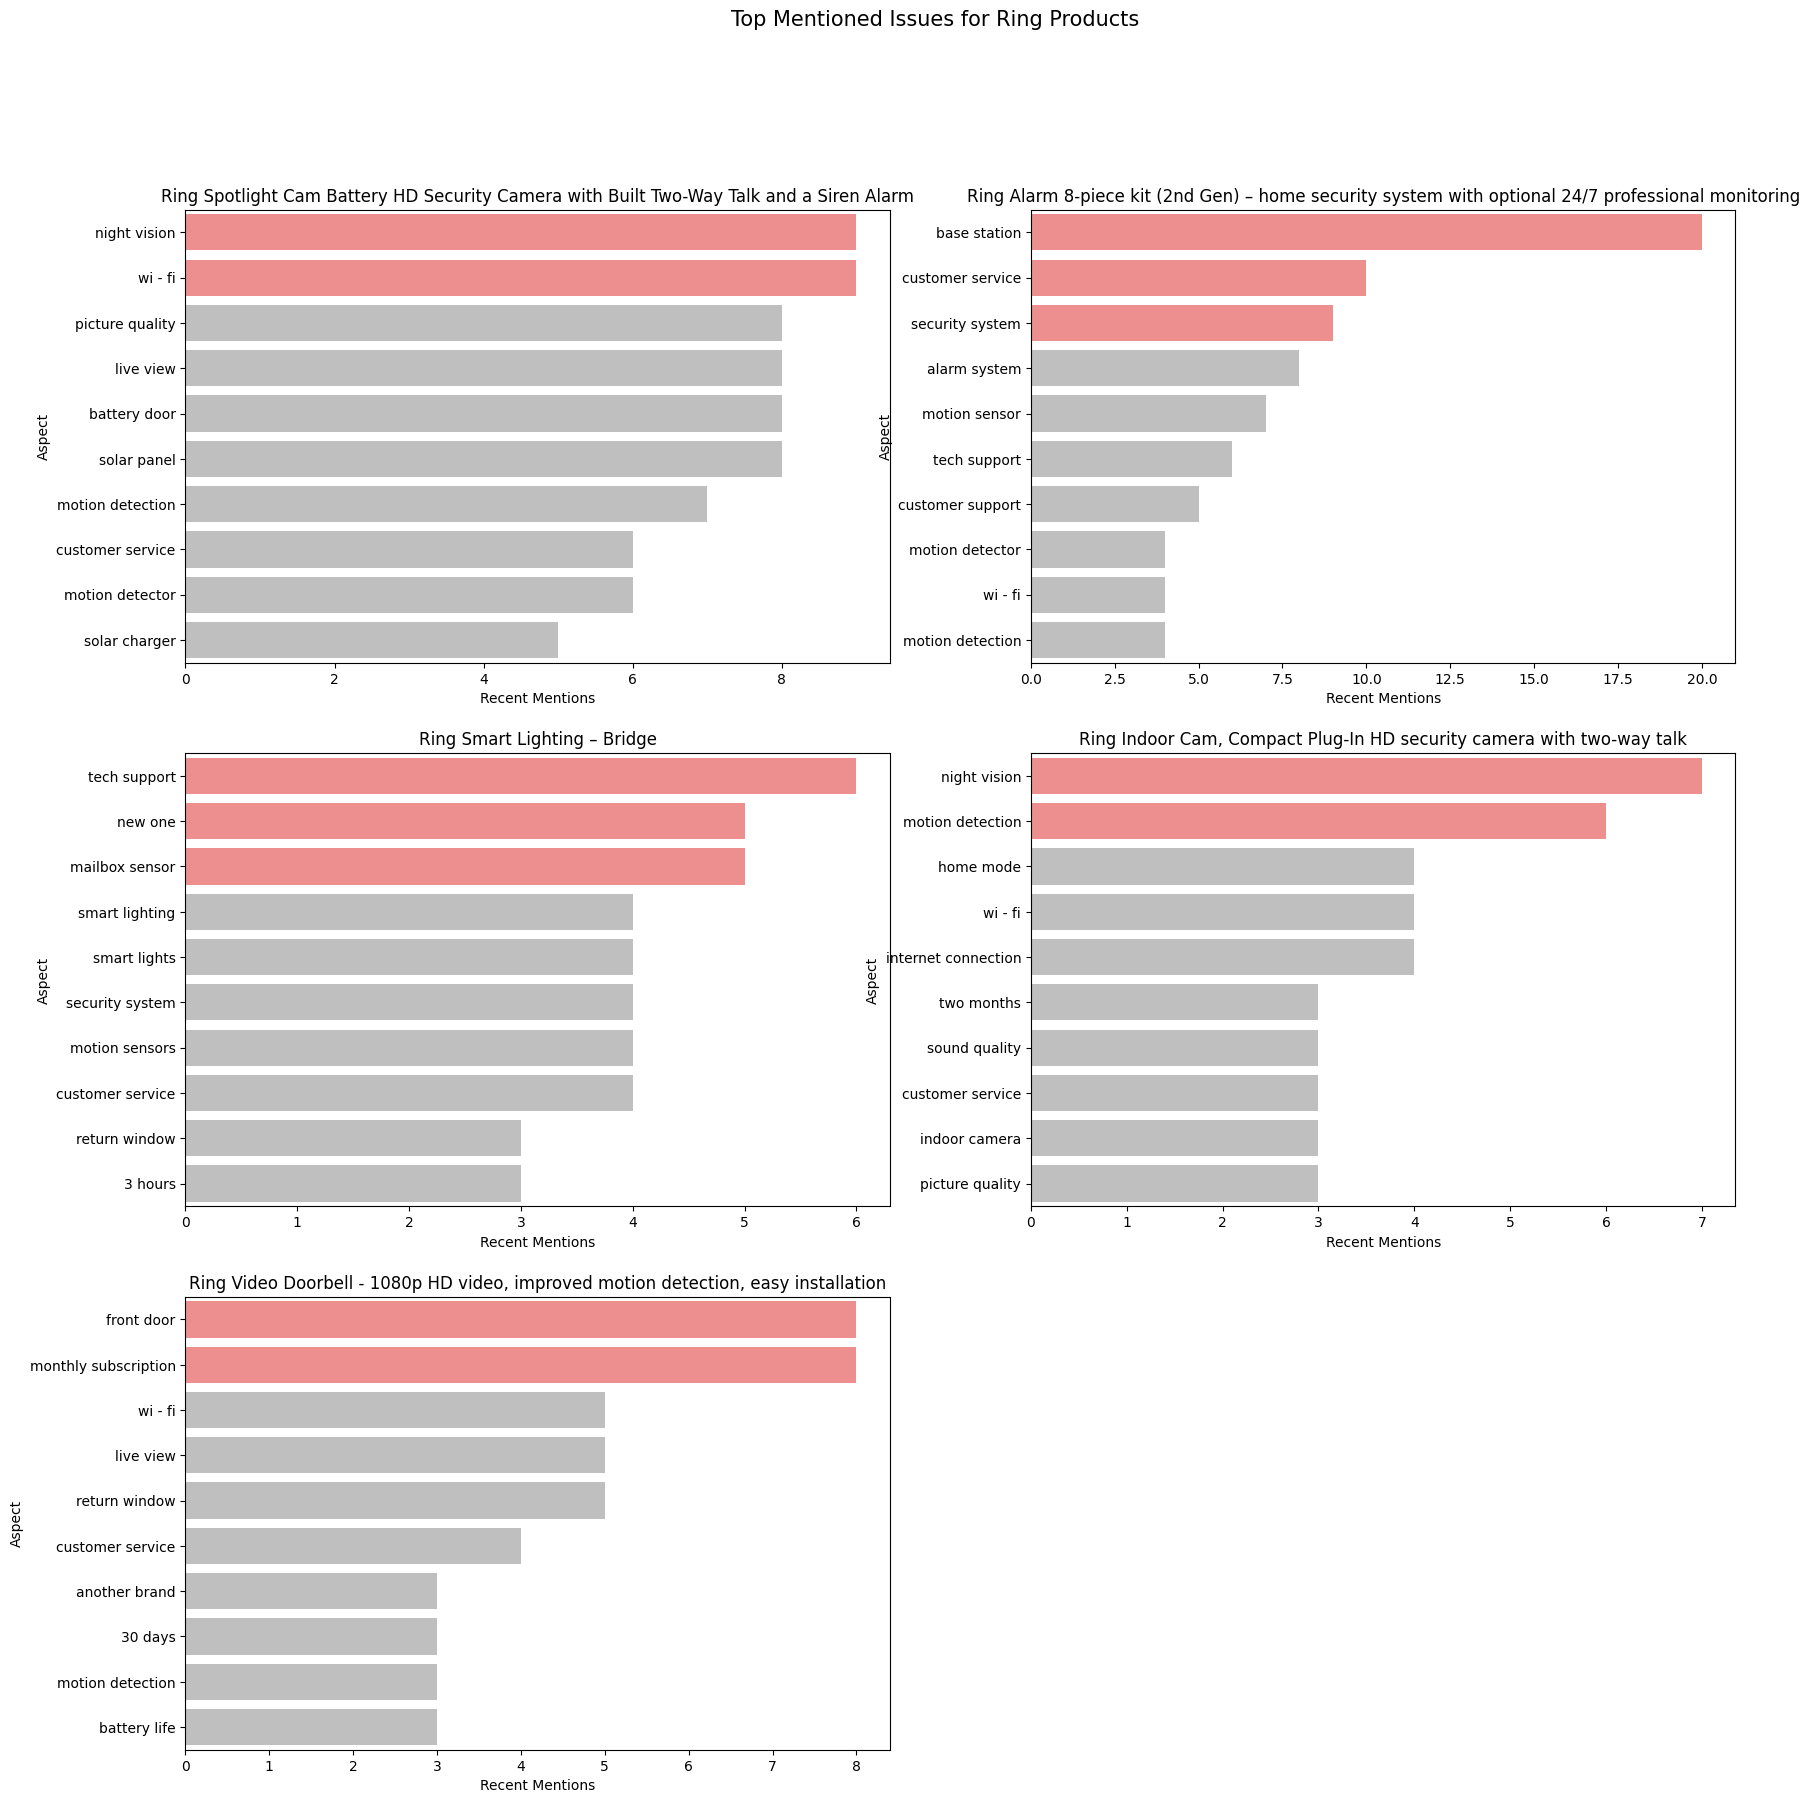

In [ ]:
from seaborn._core.properties import FontSize
import spacy
from spacy import displacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter


# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to extract aspects from reviews
stop_words = list(set(stopwords.words('english')))
def extract_aspects(text):
    doc = nlp(text)
    aspects = []
    for chunk in doc.noun_chunks:
        if chunk.root.pos_ == 'NOUN':
            # Remove stop words from the chunk
            filtered_chunk = [token.text for token in chunk if token.text.lower() not in stop_words]
            if filtered_chunk:
                aspects.append(' '.join(filtered_chunk))
    return aspects


# Implement the above extraction for each product's reviews
plt.figure(figsize = (20,20))
for i, product in enumerate(reviews_df['product'].unique()):
  # Filter data for the selected product and extract review bodies
  review_text = ' '.join([body.strip().lower() for body in reviews_df[(reviews_df.score < 3)&(reviews_df['product'] == product)].body.values])
  
  # Example usage
  aspects = extract_aspects(review_text)

  # Remove if aspect is a single word or includes Ring
  aspects = [word for word in aspects if (len(word.split())>1) and ('ring' not in word.lower())]

  # Count and Visualise most commonly mentioned aspects
  counter = Counter(aspects)
  data = pd.DataFrame(counter.most_common(10))
  data.columns= ['Aspect','Recent Mentions']
  plt.subplot(3,2, i+1)
  cols = ['grey' if (x <= np.percentile(data['Recent Mentions'].values, [75])[0]) else 'red' for x in data['Recent Mentions']]
  sns.barplot(x = data['Recent Mentions'], y = data['Aspect'], palette = cols, alpha = 0.5)
  plt.title(product)
plt.subplot(3,2,6)
plt.axis(False)
plt.suptitle('Top Mentioned Issues for Ring Products', fontsize = 15)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import joblib
import eli5

products = reviews_df['product'].unique()
important_features = {}
for product in products:
    # Select reviews and scores
    data = reviews_df[reviews_df['product']==product][['body', 'score']]
    # Separate the review text and rating columns
    text = data['body']
    ratings = data['score']

    # Convert the rating values to binary labels (0 for negative, 1 for positive)
    labels = np.where(ratings <= 3, 1, 0)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.1, random_state=42)
    transformer = TfidfVectorizer( stop_words='english', ngram_range=(2,4),# stop_words='english',
                                  lowercase=True, max_features=1000)
    X_train = transformer.fit_transform(X_train)
    X_test = transformer.transform(X_test)


    model =  LogisticRegression(C=2, random_state=42, n_jobs=-1, class_weight = 'balanced')

    def prediction(model, X_train, y_train, X_valid, y_valid):
        model.fit(X_train, y_train)
        pred = model.predict(X_valid) # use proba -> adjust threshold for better accuracy
        acc = accuracy_score(y_valid, pred)
        f1 = f1_score(y_valid, pred, average = 'weighted')
        report=classification_report(y_valid, pred)
        joblib.dump(model, f"model_acc_{acc:.5f}.pkl")
        return model, acc, f1, report
    fit_model, acc, f1, report = prediction(model, X_train, y_train, X_test, y_test)

    # Add feature importances to the dictionary
    important_features[product] = eli5.show_weights(estimator=fit_model, 
                                  feature_names= list(transformer.vocabulary_.keys()) ,top=(15,15))

In [ ]:
# Display result for arbitrary product
product = products[1]
print(product)
important_features[product]

Ring Alarm 8-piece kit (2nd Gen) – home security system with optional 24/7 professional monitoring


# Product Negative Review Wordclouds

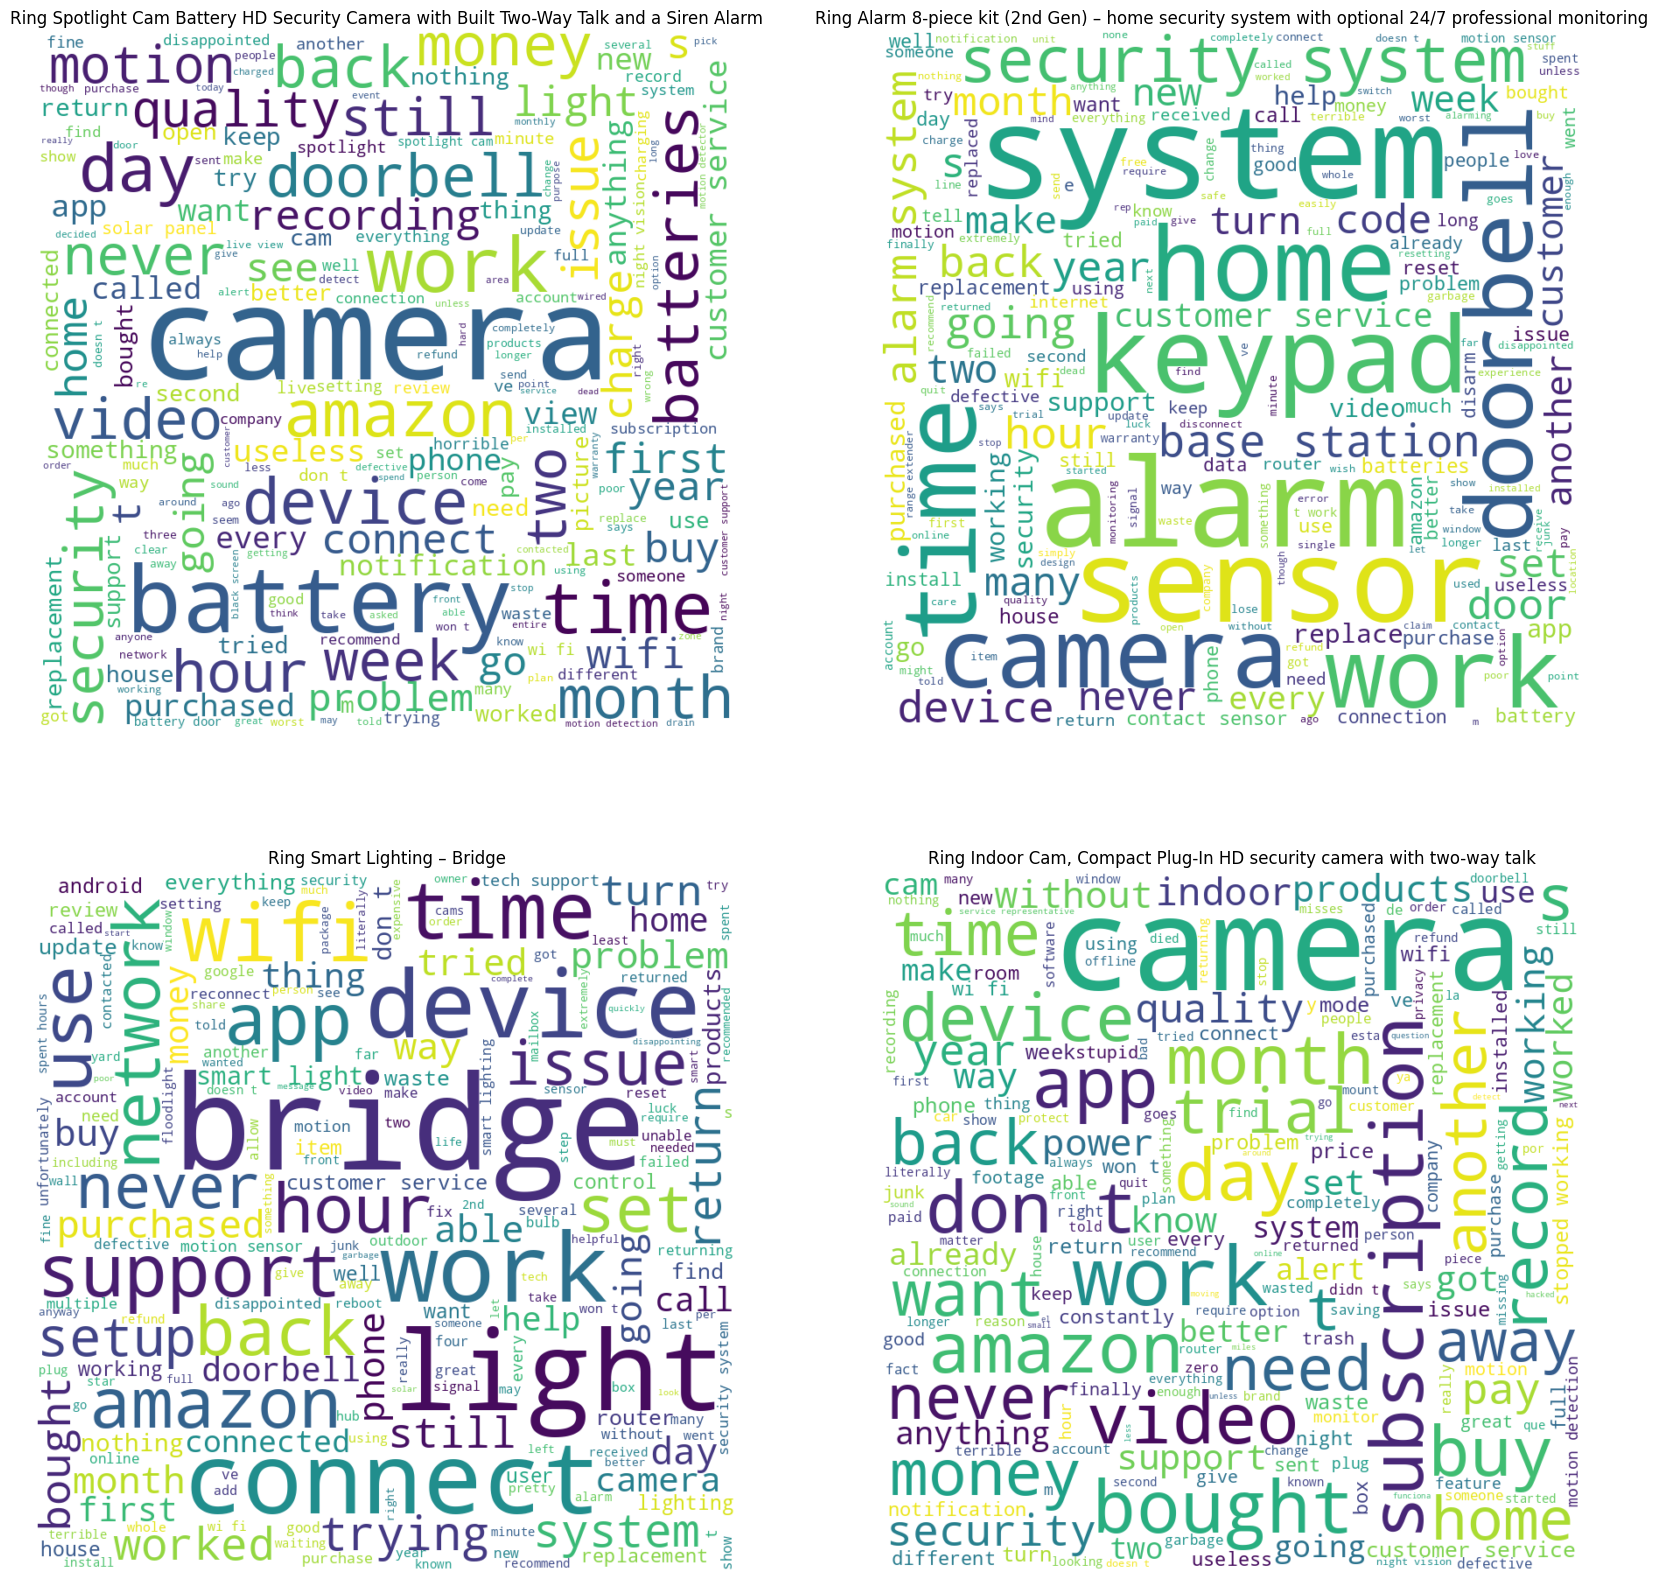

In [ ]:
# Import necessary libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk

# Download stopwords if needed
nltk.download('stopwords')

# Filter out stop words and common words
stopwords = set(STOPWORDS)
stopwords.update(['product', 'ring', "said", "say", "will", "now", "one", "just", "us", "even", "made"])

# Plot word clouds for each product's negative reviews
plt.figure(figsize = (20,20))
for i, product in enumerate(products[:4]):

  # Load text data
  text = ' '.join([review.lower().strip("'").strip('.').strip() for review in reviews_df[(reviews_df['score']<2)&(reviews_df['product']==product)].body.values])

  # Generate word cloud
  wordcloud = WordCloud(stopwords=stopwords, width=800, height=800, max_font_size=150, background_color='white').generate(text)

  # Display the generated image
  plt.subplot(2,2,i+1)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(product)
plt.show()


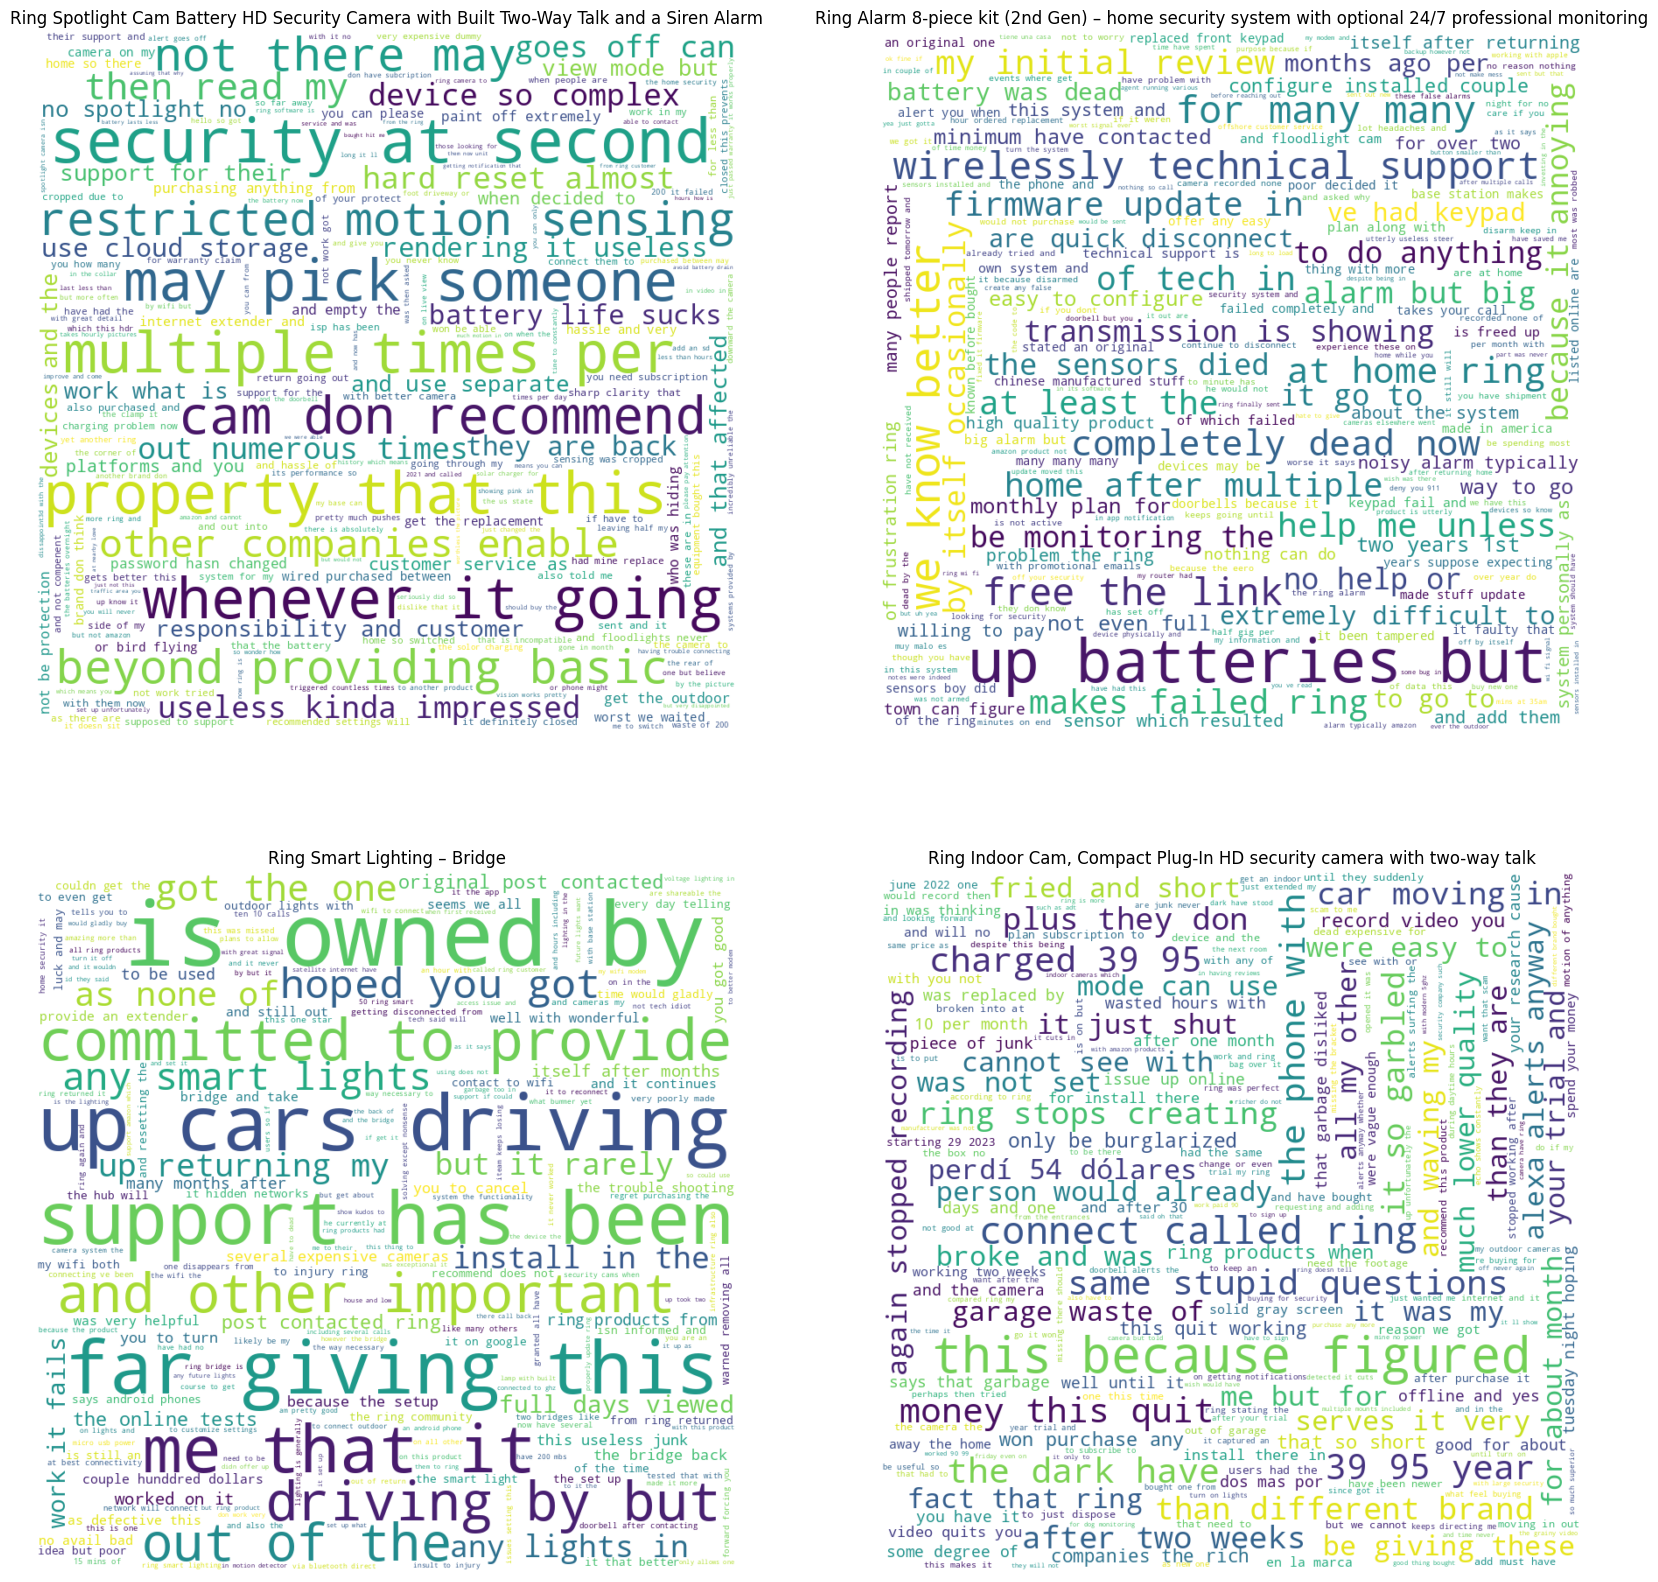

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


plt.figure(figsize=(20,20))
for i, product in enumerate(products[:4]):
    # Load text data
    text =  ' '.join([review.lower().strip("'").strip('.').strip() for review in reviews_df[(reviews_df['score']<3)&(reviews_df['product']==product)].body.values])

    # Create a CountVectorizer object to extract bigrams
    vectorizer = CountVectorizer(ngram_range=(3, 3))

    # Fit and transform the text data to get bigram counts
    X = vectorizer.fit_transform([text])
    bigram_counts = X.toarray()[0]

    # Create a dictionary of bigram counts
    bigrams = vectorizer.vocabulary_
    bigram_dict = dict(zip(bigrams, bigram_counts))

    # Generate the bigram word cloud
    wordcloud = WordCloud(background_color='white', width=800, height=800).generate_from_frequencies(bigram_dict)

    # Display the word cloud
    plt.subplot(2,2,i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(product)
plt.show()

# Sentiment Analysis

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Define the input data
texts = reviews_df[(reviews_df.score!=3)]['body'].str.lower().values

# Define the labels for the input data
labels = (reviews_df[(reviews_df.score!=3)].score<3).astype('int')
train_x, test_x, train_y, test_y = train_test_split(texts, labels, test_size = 0.15)

# Define the TextVectorization layer with a maximum vocabulary size of 1000 words
vectorizer = TextVectorization(max_tokens= 4000)

# Adapt the TextVectorization layer to the input texts
vectorizer.adapt(train_x)

# Define the model architecture
model = tf.keras.Sequential([
    vectorizer,
    tf.keras.layers.Embedding(input_dim=len(vectorizer.get_vocabulary()), output_dim=32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model on the input texts and categorical labels
model.fit(train_x, train_y, epochs=6, validation_data=(test_x, test_y))

# Predict the sentiment class for the new input texts
predictions = model.predict(test_x)


Epoch 1/6
63/63 [==============================] - 54s 492ms/step - loss: 0.5958 - accuracy: 0.6787 - val_loss: 0.5198 - val_accuracy: 0.6836
Epoch 2/6
63/63 [==============================] - 28s 454ms/step - loss: 0.4314 - accuracy: 0.8171 - val_loss: 0.4172 - val_accuracy: 0.8051
Epoch 3/6
63/63 [==============================] - 30s 482ms/step - loss: 0.2839 - accuracy: 0.8931 - val_loss: 0.3600 - val_accuracy: 0.8333
Epoch 4/6
63/63 [==============================] - 29s 466ms/step - loss: 0.1884 - accuracy: 0.9355 - val_loss: 0.3436 - val_accuracy: 0.8503
Epoch 5/6
63/63 [==============================] - 31s 490ms/step - loss: 0.1469 - accuracy: 0.9550 - val_loss: 0.3354 - val_accuracy: 0.8644
Epoch 6/6
12/12 [==============================] - 3s 122ms/step


In [ ]:
from textblob import TextBlob

# Define the input text
text = reviews_df['body'].str.lower().values

# Use TextBlob to generate a sentiment score for the text
sentiment_polarity = []
for review in text:
  blob = TextBlob(review)
  sentiment_polarity.append(blob.sentiment.polarity)
  
# Add sentiment column to the dataframe
reviews_df['sentiment'] = sentiment_polarity
reviews_df.head()

title  \
1683                                          delayed   
2294                                           Alarms   
1844  It’s been a year now and is still working great   
1845                 New packaging but a used product   
1684                          Loved it…but short life   

                                                   body        date  \
1683  The unit and Ring has a delay in the motion no...  01-01-2022   
2294  Be sure to check settings to see how the unit ...  01-01-2022   
1844    It’s been a year now and is still working great  01-01-2022   
1845  The ring product is great! The problem is Amaz...  01-01-2022   
1684  I’m really bummed to have found this out. I wa...  01-01-2022   

            status  votes          color  configuration  score  \
1683      Verified      0          White    Device Only    3.0   
2294      Verified      0  Single Option  Single Option    4.0   
1844      Verified      0  Single Option  Single Option    5.0   
1845  Not Verified      1  Single Option  Single Option    1.0   
1684  Not Verified      1          White    Device Only    1.0   

                                                product        asin  \
1683  Ring Spotlight Cam Battery HD Security Camera ...  B0758L64L9   
2294  Ring Alarm 8-piece kit (2nd Gen) – home securi...  B07ZPMCW64   
1844                       Ring Smart Lighting – Bridge  B07KXBX65F   
1845                       Ring Smart Lighting – Bridge  B07KXBX65F   
1684  Ring Spotlight Cam Battery HD Security Camera ...  B0758L64L9   

              style           size  sentiment  
1683  Single Option          1 Cam   0.000000  
2294     Ring Alarm  Single Option   0.500000  
1844  Single Option  Single Option   0.800000  
1845  Single Option  Single Option   0.400189  
1684  Single Option          1 Cam  -0.016414

In [ ]:
reviews_df.to_csv('ring_sentiment_reviews.csv', index = False)